# **Customer Segmentation**

**Subject:** BADS7105 - CRM Analytics and Intelligence

**Student:** Pawarut Kongratana (6210422006)

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler, RobustScaler

In [2]:
df = pd.read_csv('query.csv')
df.head(3)

,CUST_CODE,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE
0,CUST0000000181,2.44,2.440000,0.000000,1,1.000000,0.000000,1,0,547,547
1,CUST0000000369,26861.24,34.261786,20.446128,220,7.857143,3.388155,2,811,812,1
2,CUST0000000689,2957.13,36.507778,36.112964,16,1.777778,1.227262,3,337,350,13


In [72]:
df['RECENCY'] =  (
    (( df['DURATION_FROM_FIRST_PURCHASE'] - df['DURATION_FROM_LAST_PURCHASE'] ) / df['DURATION_FROM_FIRST_PURCHASE'])
)

In [154]:
df.head(3)

,CUST_ID,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE,Recency,RECENCY
0,CUST0000000181,2.44,2.440000,0.000000,1,1.000000,0.000000,1,0,547,547,0.000000,0.000000
1,CUST0000000369,26861.24,34.261786,20.446128,220,7.857143,3.388155,2,811,812,1,0.998768,0.998768
2,CUST0000000689,2957.13,36.507778,36.112964,16,1.777778,1.227262,3,337,350,13,0.962857,0.962857


# Clustering Model

In [73]:
Features = ['AVG_MONTHLY_SPEND','STD_MONTHLY_SPEND','AVG_MONTHLY_VISIT','STD_MONTHLY_VISIT','MODE_BASKET_SIZE','CUST_LIFETIME','DURATION_FROM_LAST_PURCHASE','RECENCY']

X = df[Features]
X_std = pd.DataFrame(StandardScaler().fit_transform(X))

Text(0, 0.5, 'Silhouette Score')

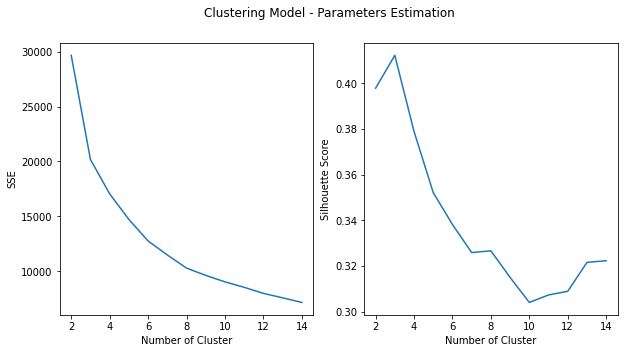

In [138]:
sse = []
sil = []
n = range(2, 15)

for i in n:
  kmeans = KMeans(n_clusters=i, n_init=50).fit(X_std)
  sse.append(kmeans.inertia_)
  sil.append(silhouette_score(X_std, kmeans.labels_, metric='euclidean'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Clustering Model - Parameters Estimation')

ax1.plot(n, sse)
ax1.set_xlabel('Number of Cluster')
ax1.set_ylabel('SSE')

ax2.plot(n, sil)
ax2.set_xlabel('Number of Cluster')
ax2.set_ylabel('Silhouette Score')

In [139]:
df_cluster = df.copy()
df_cluster['CLUSTER'] = KMeans(n_clusters=10, n_init=50, random_state=10).fit_predict(X_std)
df_cluster.head(5)

,CUST_ID,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE,Recency,RECENCY,CLUSTER
0,CUST0000000181,2.44,2.440000,0.000000,1,1.000000,0.000000,1,0,547,547,0.000000,0.000000,5
1,CUST0000000369,26861.24,34.261786,20.446128,220,7.857143,3.388155,2,811,812,1,0.998768,0.998768,8
2,CUST0000000689,2957.13,36.507778,36.112964,16,1.777778,1.227262,3,337,350,13,0.962857,0.962857,1
3,CUST0000000998,11.90,2.975000,2.135000,3,1.500000,0.500000,1,64,794,730,0.080605,0.080605,5
4,CUST0000001163,158.96,9.935000,9.546134,4,1.000000,0.000000,3,609,623,14,0.977528,0.977528,9


In [143]:
df_cluster_color = df_cluster.copy()
df_cluster_color['CLUSTER'].replace({0: "red", 1: "green", 2: "blue",
                                    3: "yellow", 4: "violet", 5: "cyan",
                                    6: "slategrey", 7: "slateblue", 8:"tan",
                                    9: "orange"}, inplace=True)

In [144]:
df_cluster_color.head(10)

,CUST_ID,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE,Recency,RECENCY,CLUSTER
0,CUST0000000181,2.44,2.440000,0.000000,1,1.000000,0.000000,1,0,547,547,0.000000,0.000000,cyan
1,CUST0000000369,26861.24,34.261786,20.446128,220,7.857143,3.388155,2,811,812,1,0.998768,0.998768,tan
2,CUST0000000689,2957.13,36.507778,36.112964,16,1.777778,1.227262,3,337,350,13,0.962857,0.962857,green
3,CUST0000000998,11.90,2.975000,2.135000,3,1.500000,0.500000,1,64,794,730,0.080605,0.080605,cyan
4,CUST0000001163,158.96,9.935000,9.546134,4,1.000000,0.000000,3,609,623,14,0.977528,0.977528,orange
5,CUST0000001194,67333.41,92.364074,50.744659,103,3.814815,1.806102,3,790,806,16,0.980149,0.980149,slateblue
6,CUST0000002257,1.99,1.990000,0.000000,1,1.000000,0.000000,1,0,716,716,0.000000,0.000000,cyan
7,CUST0000002499,0.34,0.340000,0.000000,1,1.000000,0.000000,1,0,814,814,0.000000,0.000000,cyan
8,CUST0000002605,9.00,0.360000,0.120000,6,1.200000,0.400000,1,613,637,24,0.962323,0.962323,blue
9,CUST0000002637,1370.93,11.330000,5.284480,15,1.363636,0.642824,3,666,703,37,0.947368,0.947368,orange


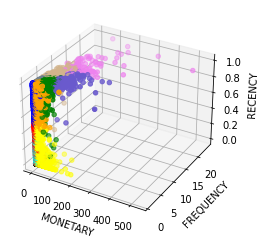

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_cluster['AVG_MONTHLY_SPEND']
y = df_cluster['AVG_MONTHLY_VISIT']
z = df_cluster['RECENCY']
c = df_cluster_color['CLUSTER']


ax.scatter(x, y, z, c=c)

ax.set_xlabel('MONETARY')
ax.set_ylabel('FREQUENCY')
ax.set_zlabel('RECENCY')

plt.show()

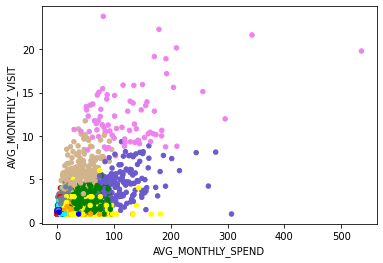

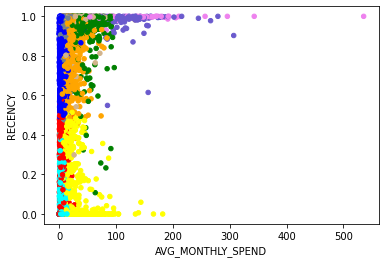

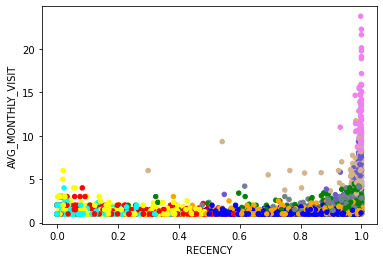

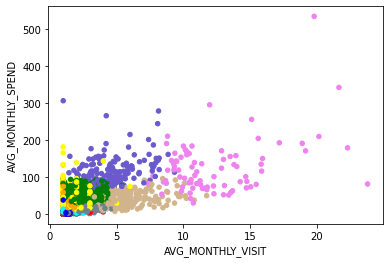

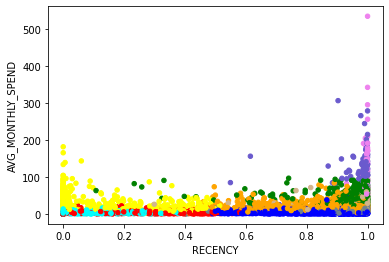

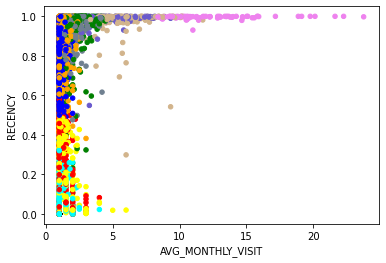

In [152]:
PlotMF = df_cluster.plot.scatter(x='AVG_MONTHLY_SPEND', y='AVG_MONTHLY_VISIT', c=c)
PlotMR = df_cluster.plot.scatter(x='AVG_MONTHLY_SPEND', y='RECENCY', c=c)
PlotFR = df_cluster.plot.scatter(x='RECENCY', y='AVG_MONTHLY_VISIT', c=c)

PlotFM = df_cluster.plot.scatter(y='AVG_MONTHLY_SPEND', x='AVG_MONTHLY_VISIT', c=c)
PlotRM = df_cluster.plot.scatter(y='AVG_MONTHLY_SPEND', x='RECENCY', c=c)
PlotRF = df_cluster.plot.scatter(y='RECENCY', x='AVG_MONTHLY_VISIT', c=c)


In [167]:
n = 10
for i in range (n):
    print("Cluster :",i)
    print((df_cluster['CLUSTER']==i).sum())
    

Cluster : 0
1164
Cluster : 1
453
Cluster : 2
980
Cluster : 3
689
Cluster : 4
82
Cluster : 5
1065
Cluster : 6
499
Cluster : 7
152
Cluster : 8
206
Cluster : 9
810
